<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Proyecto_Eq_2_Ney_Carlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
path = '/content/drive/MyDrive/Data mining/Challenge_4y5 clean.xlsx'

In [170]:
df = pd.read_excel(path)
df.head(3)

,Cliente,Producto,sem44,sem43,sem42,sem41
0,500000055,BEBIDAS REFRESCANTES,0.4227,0.4227,0.000000,0.422700
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.6016,6.0655,12.680500,8.601600
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.7700,22.8953,46.847499,30.292399


We have a database of sales by customer by product (the customer line is repeated to differentiate between each product) over 4 weeks.

We create a column for the total sales over the 4 weeks.

In [171]:
df['Total'] = df.iloc[:, 2:].sum(axis=1)
df

,Cliente,Producto,sem44,sem43,sem42,sem41,Total
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700,1.268100
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600,35.949199
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399,126.805198
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900,0.387500
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000,5.072000
...,...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100,164.141797
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498,328.285192
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000,7.044800
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000,0.140900


We replace NaNs with 0's

In [84]:
ndf = df.fillna(0)

In [85]:
type(ndf)

pandas.core.frame.DataFrame

We validate if there are any remaining NaN values

In [86]:
ndf.isnull().values.any()

False

#Análisis de los datos

In [87]:
ndf.Producto.nunique()

27

In [88]:
ndf.Cliente.nunique()

66338

We analyze the purchasing behavior of 66,338 customers in relation to 27 different products over 4 weeks.

In [89]:
ndf

,Cliente,Producto,sem44,sem43,sem42,sem41,Total
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700,1.268100
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600,35.949199
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399,126.805198
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900,0.387500
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000,5.072000
...,...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100,164.141797
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498,328.285192
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000,7.044800
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000,0.140900


We delete the transaction lines that did not show any purchases in any of the weeks.

In [90]:
ndf = ndf.loc[df['Total'] != 0]

In [91]:
ndf

,Cliente,Producto,sem44,sem43,sem42,sem41,Total
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700,1.268100
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600,35.949199
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399,126.805198
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900,0.387500
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000,5.072000
...,...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100,164.141797
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498,328.285192
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000,7.044800
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000,0.140900


In [92]:
ndf.Cliente.nunique()

65724

In [93]:
ndf.Producto.count()

896072

In [94]:
trans_promedio = ndf.Producto.count() / ndf.Cliente.nunique()
trans_promedio

13.633862820278742

In [95]:
unidades_promedio = ndf.Total.sum() / ndf.Cliente.nunique()
unidades_promedio

261.45538435068096

We are left with 65,524 customers who made 896,072 transactions, meaning an average of 13.63 transactions (purchase per product) per customer over the 4 weeks.

On average, each customer bought 261.4553 units of products in the sum of all their transactions during the 4 weeks


# Main sales by category

We count the total purchased per product over the 4 weeks:


We create the "Categoria" Column

In [96]:
ndf['Categoria'] = np.select([ndf['Producto'].str.startswith('AGUA'),
                        ndf['Producto'].str.startswith('BEBIDAS'),
                        ndf['Producto'].str.startswith('COLAS'),
                        ndf['Producto'].str.startswith('ISOTONICOS'),
                        ndf['Producto'].str.startswith('JUGOS'),
                        ndf['Producto'].str.startswith('LECHE'),
                        ndf['Producto'].str.startswith('NARANJADAS'),
                        ndf['Producto'].str.startswith('SABORES'),
                        ndf['Producto'].str.startswith('TE')],
                       choicelist=['AGUA', 'BEBIDAS', 'COLAS', 'ISOTONICOS', 'JUGOS', 'LECHE', 'NARANJADAS', 'SABORES', 'TE'])
ndf 

<ipython-input-96-b6f0e2039385>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Categoria'] = np.select([ndf['Producto'].str.startswith('AGUA'),


,Cliente,Producto,sem44,sem43,sem42,sem41,Total,Categoria
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700,1.268100,BEBIDAS
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600,35.949199,COLAS
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399,126.805198,COLAS
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900,0.387500,LECHE
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000,5.072000,COLAS
...,...,...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100,164.141797,COLAS
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498,328.285192,COLAS
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000,7.044800,AGUA
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000,0.140900,LECHE


In [97]:
counts = ndf ['Categoria'].value_counts().to_frame() #contar por Categoria
counts

,Categoria
COLAS,307457
SABORES,158447
AGUA,126122
BEBIDAS,80375
LECHE,56989
JUGOS,48119
NARANJADAS,46353
ISOTONICOS,40889
TE,31321


In [98]:
suma = counts.iloc[:,:].sum()
suma

Categoria    896072
dtype: int64

In [99]:
counts['%'] = (counts.iloc[:,:]/suma)*100
counts

,Categoria,%
COLAS,307457,34.311640
SABORES,158447,17.682396
AGUA,126122,14.074985
BEBIDAS,80375,8.969703
LECHE,56989,6.359868
JUGOS,48119,5.369993
NARANJADAS,46353,5.172910
ISOTONICOS,40889,4.563138
TE,31321,3.495366


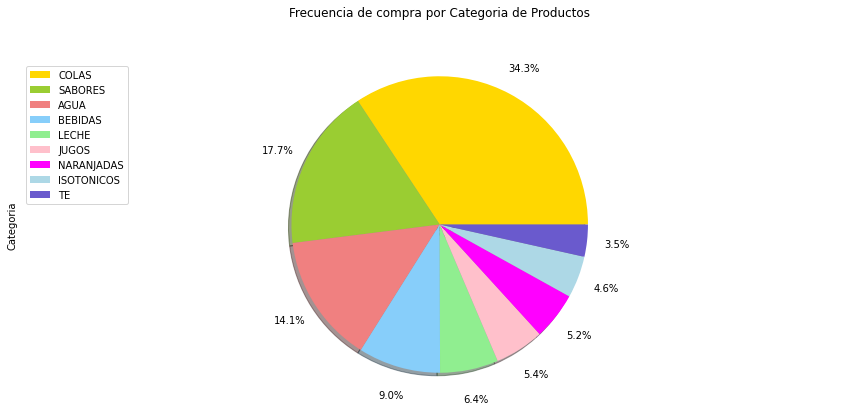

In [100]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'magenta', 'lightblue', 'slateblue']

counts ['Categoria'].plot(kind = 'pie',
                       labels = None,
                       figsize = (15, 6),
                       autopct = '%1.1f%%', #.1f decimales del porcentaje
                       pctdistance = 1.2,
                       shadow = True,
                       colors = colors_list
);
plt.title('Frecuencia de compra por Categoria de Productos', y=1.12) 
plt.axis('equal') 
plt.legend(labels=counts.index, loc='upper left')
     

In [101]:
frec_top4 = counts.iloc[:4].sum()
frec_top4

Categoria    672401.000000
%                75.038725
dtype: float64

Top 4 categories, COLAS, SABORES, AGUA y BEBIDAS appear in 75.0387% of total transactions occured during the 4 weeks.

#Top sales by product

In [128]:
total_por_producto = ndf.groupby('Producto')['Total'].sum().to_frame().sort_values("Total", ascending = False)
total_por_producto['Total'] = total_por_producto['Total'].round(2)

total_por_producto

,Total
Producto,
COLAS REGULAR FAMILIAR RETORNABLE,19554094.61
COLAS REGULAR FAMILIAR NO RETORNABLE,13880320.96
COLAS REGULAR INDIVIDUAL NO RETORNABLE,6069096.96
COLAS REGULAR INDIVIDUAL RETORNABLE,5983092.04
SABORES REGULAR FAMILIAR NO RETORNABLE,3525973.89
SABORES REGULAR INDIVIDUAL NO RETORNABLE,2253147.40
NARANJADAS,1865844.07
AGUA PURIFICADA INDIVIDUAL,1783262.40
SABORES REGULAR INDIVIDUAL RETORNABLE,1656753.23


In [129]:
total_por_producto["Participacion"] = (total_por_producto["Total"] / total_por_producto["Total"].sum()) * 100

total_por_producto

,Total,Participacion
Producto,,
COLAS REGULAR FAMILIAR RETORNABLE,19554094.61,31.066590
COLAS REGULAR FAMILIAR NO RETORNABLE,13880320.96,22.052375
COLAS REGULAR INDIVIDUAL NO RETORNABLE,6069096.96,9.642285
COLAS REGULAR INDIVIDUAL RETORNABLE,5983092.04,9.505644
SABORES REGULAR FAMILIAR NO RETORNABLE,3525973.89,5.601895
SABORES REGULAR INDIVIDUAL NO RETORNABLE,2253147.40,3.579690
NARANJADAS,1865844.07,2.964362
AGUA PURIFICADA INDIVIDUAL,1783262.40,2.833160
SABORES REGULAR INDIVIDUAL RETORNABLE,1656753.23,2.632169


In [130]:
total_por_producto["Participacion"] = total_por_producto["Participacion"].astype(float)


In [131]:
suma_producto = total_por_producto.iloc[:,0].sum()
suma_producto

62942520.86

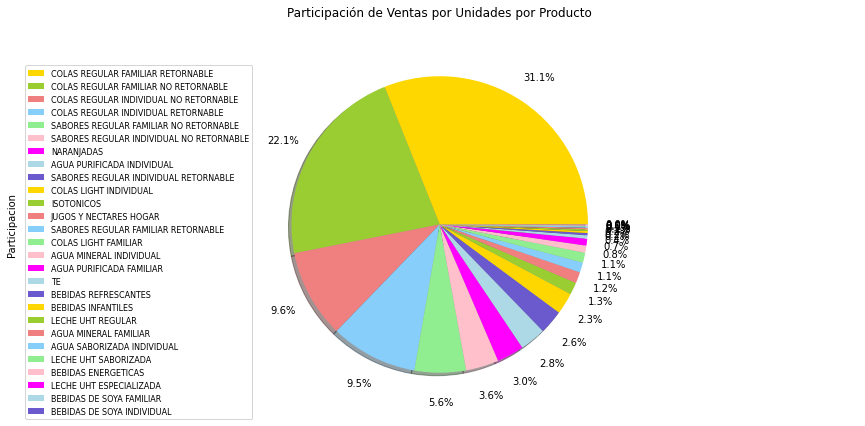

In [132]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'magenta', 'lightblue', 'slateblue']

total_por_producto['Participacion'].plot(kind = 'pie',
                       labels = None,
                       figsize = (15, 6),
                       autopct = '%1.1f%%', #.1f decimales del porcentaje
                       pctdistance = 1.2,
                       shadow = True,
                       colors = colors_list
);
plt.title('Participación de Ventas por Unidades por Producto', y=1.12)
plt.axis('equal') 
plt.legend(labels=total_por_producto.index, loc='upper left', fontsize=8)
plt.show()

#Top sales by category

In [133]:
total_por_categoria = ndf.groupby('Categoria')['Total'].sum().to_frame().sort_values("Total", ascending = False)
total_por_categoria['Total'] = total_por_categoria['Total'].round(2).astype(float)

total_por_categoria

,Total
Categoria,
COLAS,47642544.16
SABORES,8122537.01
AGUA,2938050.47
NARANJADAS,1865844.07
ISOTONICOS,838020.46
JUGOS,766392.16
BEBIDAS,343183.01
TE,229727.08
LECHE,196222.44


In [134]:
total_por_categoria["Participacion"] = (total_por_categoria["Total"] / total_por_categoria["Total"].sum()) * 100
total_por_categoria["Participacion"] = total_por_categoria["Participacion"].map("{:.2f}".format)
total_por_categoria['Total'] = total_por_categoria['Total'].apply(lambda x: '{:,.2f}'.format(x))
total_por_categoria

,Total,Participacion
Categoria,,
COLAS,"47,642,544.16",75.69
SABORES,"8,122,537.01",12.90
AGUA,"2,938,050.47",4.67
NARANJADAS,"1,865,844.07",2.96
ISOTONICOS,"838,020.46",1.33
JUGOS,"766,392.16",1.22
BEBIDAS,"343,183.01",0.55
TE,"229,727.08",0.36
LECHE,"196,222.44",0.31


In [140]:
colas_amount_perc = 47642544.16/62942520.86
colas_amount_perc

0.7569214500634476

In [135]:
colas_amount_% =part_colas = total_por_producto.loc[total_por_producto.index.str.startswith('COLA'), 'Participacion'].sum()
part_colas

75.69214500634476

In [136]:
part_familiar = total_por_producto.loc[total_por_producto.index.str.contains('FAMILIAR'), 'Participacion'].sum()
part_familiar

61.83441862229857

Out of the top 10 selling products, 5 are from the COLAS category.

COLAS represent 75.69% out of all units sold during the 4 weeks for all products.

This reflects the big poppularity of COLAS products among customers or because they have more marketing efforts.

It is also noteworthy that the top 2 products are FAMILIAR size COLAS and they represent 49.71% of total units sold just between them.

On this note, it is interesting to contrast the Frecuency of Purchase diagram, where COLAS category has a participation of 34.3%, with the 75.69% participation of COLAS when looking at total units sold.

This means, when customers buy COLAS category products, they do it in big amounts. This could happen because of several factors:

1.- The perception of customers of getting more value for their money when buying in bigger sizes presentations.

2.- The "standard flavor" attribute given to COLA flavor beverages in contrast to any other flavor creating a "one size fits all" phenomena and becoming the default option for family dinners.

#Overview of Total Sales Per Week

We will look into the sales per Category and products per week to see if we any noteworthy indicators, parting from the premise that people in Mexico get paid approximately every 2 weeks.

Amount of Products

In [137]:
ndf.Producto.nunique()

27

In [138]:
ndf.rename({"sem41": "Semana 1",
           "sem42": "Semana 2",
           "sem43": "Semana 3",
            "sem44": "Semana 4"
           },
          axis=1,
          inplace= True
          )
ndf.head()

,Cliente,Producto,Total,Categoria,Semana,Unidades
2688222,500000055,AGUA MINERAL INDIVIDUAL,1.2681,AGUA,Semana 1,1.2681
896077,500000055,BEBIDAS INFANTILES,0.2642,BEBIDAS,Semana 3,0.2642
0,500000055,BEBIDAS REFRESCANTES,1.2681,BEBIDAS,Semana 4,0.4227
896072,500000055,BEBIDAS REFRESCANTES,1.2681,BEBIDAS,Semana 3,0.4227
2688216,500000055,BEBIDAS REFRESCANTES,1.2681,BEBIDAS,Semana 1,0.4227


In [110]:
id_vars = ["Cliente", "Producto", "Total", "Categoria"]
ndf = ndf.melt(id_vars=id_vars, var_name="Semana", value_name="Unidades")
ndf = ndf.sort_values(["Cliente", "Producto"])


In [111]:
ndf.reset_index(drop=True)

,Cliente,Producto,Total,Categoria,Semana,Unidades
0,500000055,AGUA MINERAL INDIVIDUAL,1.2681,AGUA,Semana 4,0.0000
1,500000055,AGUA MINERAL INDIVIDUAL,1.2681,AGUA,Semana 3,0.0000
2,500000055,AGUA MINERAL INDIVIDUAL,1.2681,AGUA,Semana 2,0.0000
3,500000055,AGUA MINERAL INDIVIDUAL,1.2681,AGUA,Semana 1,1.2681
4,500000055,BEBIDAS INFANTILES,0.2642,BEBIDAS,Semana 4,0.0000
...,...,...,...,...,...,...
3584283,500257111,SABORES REGULAR INDIVIDUAL NO RETORNABLE,13.9209,SABORES,Semana 1,3.8043
3584284,500257111,SABORES REGULAR INDIVIDUAL RETORNABLE,9.9541,SABORES,Semana 4,2.1134
3584285,500257111,SABORES REGULAR INDIVIDUAL RETORNABLE,9.9541,SABORES,Semana 3,3.6139
3584286,500257111,SABORES REGULAR INDIVIDUAL RETORNABLE,9.9541,SABORES,Semana 2,4.2268


In [112]:
ndf = ndf.loc[ndf['Unidades'] != 0]

In [113]:
ndf.reset_index(drop=True)
ndf.head(20)

,Cliente,Producto,Total,Categoria,Semana,Unidades
2688222,500000055,AGUA MINERAL INDIVIDUAL,1.268100,AGUA,Semana 1,1.268100
896077,500000055,BEBIDAS INFANTILES,0.264200,BEBIDAS,Semana 3,0.264200
0,500000055,BEBIDAS REFRESCANTES,1.268100,BEBIDAS,Semana 4,0.422700
896072,500000055,BEBIDAS REFRESCANTES,1.268100,BEBIDAS,Semana 3,0.422700
2688216,500000055,BEBIDAS REFRESCANTES,1.268100,BEBIDAS,Semana 1,0.422700
896076,500000055,COLAS LIGHT INDIVIDUAL,5.072000,COLAS,Semana 3,1.268000
1792148,500000055,COLAS LIGHT INDIVIDUAL,5.072000,COLAS,Semana 2,2.536000
2688220,500000055,COLAS LIGHT INDIVIDUAL,5.072000,COLAS,Semana 1,1.268000
11,500000055,COLAS REGULAR FAMILIAR NO RETORNABLE,18.492599,COLAS,Semana 4,6.164200
896083,500000055,COLAS REGULAR FAMILIAR NO RETORNABLE,18.492599,COLAS,Semana 3,6.164200


We create variable of sales by top 3 Categories

In [141]:
top_3_cat = ndf[ndf['Producto'].str.contains('COLA|AGUA|SABORES')]
top_3_cat

,Cliente,Producto,Total,Categoria,Semana,Unidades
2688222,500000055,AGUA MINERAL INDIVIDUAL,1.268100,AGUA,Semana 1,1.2681
896076,500000055,COLAS LIGHT INDIVIDUAL,5.072000,COLAS,Semana 3,1.2680
1792148,500000055,COLAS LIGHT INDIVIDUAL,5.072000,COLAS,Semana 2,2.5360
2688220,500000055,COLAS LIGHT INDIVIDUAL,5.072000,COLAS,Semana 1,1.2680
11,500000055,COLAS REGULAR FAMILIAR NO RETORNABLE,18.492599,COLAS,Semana 4,6.1642
...,...,...,...,...,...,...
2688205,500257111,SABORES REGULAR INDIVIDUAL NO RETORNABLE,13.920900,SABORES,Semana 2,6.2066
3584277,500257111,SABORES REGULAR INDIVIDUAL NO RETORNABLE,13.920900,SABORES,Semana 1,3.8043
896066,500257111,SABORES REGULAR INDIVIDUAL RETORNABLE,9.954100,SABORES,Semana 4,2.1134
1792138,500257111,SABORES REGULAR INDIVIDUAL RETORNABLE,9.954100,SABORES,Semana 3,3.6139


#We look at behaviour of sales per category per week

In [142]:
pivot1 = pd.pivot_table(ndf, values='Unidades', index='Semana', columns='Categoria', aggfunc=sum)

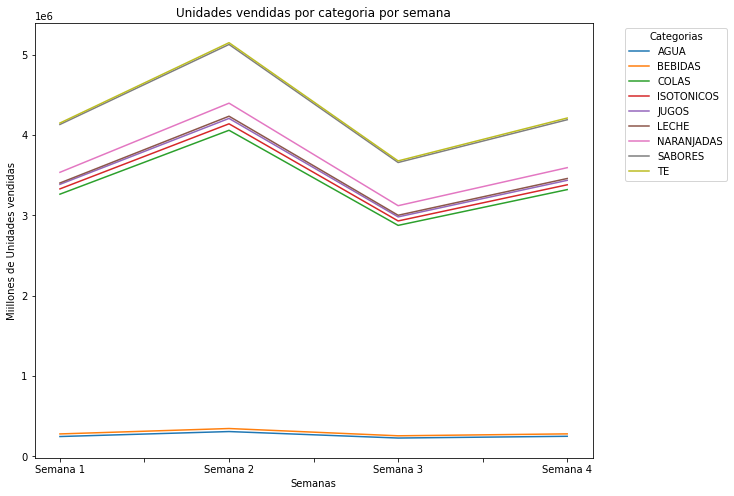

In [143]:
pivot1.plot(kind='line', stacked=True, figsize=(10, 8))
plt.xlabel('Semanas')
plt.ylabel('Miillones de Unidades vendidas')
plt.title('Unidades vendidas por categoria por semana')
plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We notice a spike on the second week for most beverages except AGUA and BEBIDAS (Energetic, Children's drinks, Refreshing) where the increase on the second week is marginal compared to the rest of the weeks.

#We look at behaviour of sales per product per week

In [144]:
pivot2 = pd.pivot_table(ndf, values='Unidades', index='Semana', columns='Producto', aggfunc=sum)

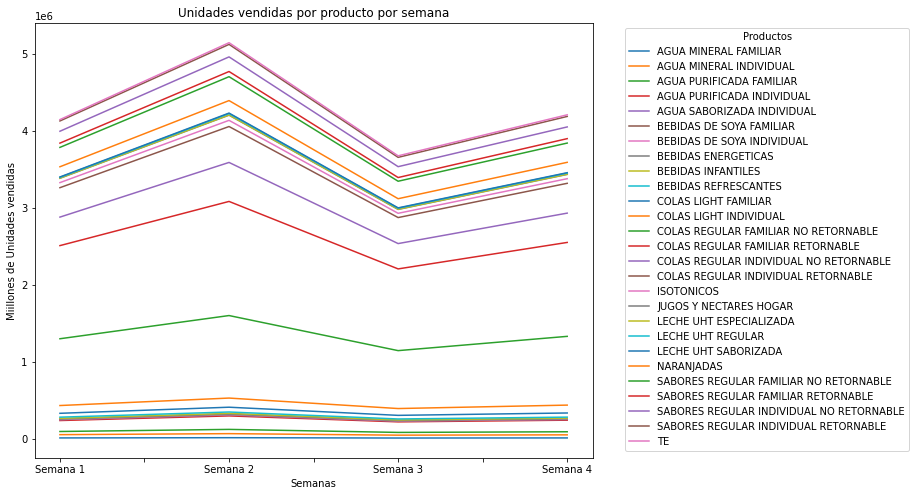

In [145]:
pivot2.plot(kind='line', stacked=True, figsize=(10, 8))
plt.xlabel('Semanas')
plt.ylabel('Miillones de Unidades vendidas')
plt.title('Unidades vendidas por producto por semana')
plt.legend(title='Productos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In general, we see there is a slight spike on units sold on the second week of the month, this could be attributed to most consumers being under a monthly budget cycle and/or paycheck cycle.

# Now le´ts use the Frequent patterns and Association rules, in order to identify those products which are often bought togheter.

Let´s importe apriori and association rules from mlxtend frequent patterns library

In [146]:
from mlxtend.frequent_patterns import apriori, association_rules

Let´s create a database where we can see by customer and products, the number 1 if the product was bought, or product 0 if the product was not bought.

In [172]:
df

,Cliente,Producto,sem44,sem43,sem42,sem41,Total
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700,1.268100
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600,35.949199
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399,126.805198
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900,0.387500
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000,5.072000
...,...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100,164.141797
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498,328.285192
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000,7.044800
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000,0.140900


In [173]:
ndf2 = df[['Cliente', 'Producto', 'Total']] # returns a dataframe
ndf2

,Cliente,Producto,Total
0,500000055,BEBIDAS REFRESCANTES,1.268100
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,35.949199
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,126.805198
3,500000055,LECHE UHT SABORIZADA,0.387500
4,500000055,COLAS LIGHT INDIVIDUAL,5.072000
...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,164.141797
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,328.285192
999997,500257111,AGUA PURIFICADA FAMILIAR,7.044800
999998,500257111,LECHE UHT SABORIZADA,0.140900


Let´s transform NaN to 0 in order to start pivoting.

In [174]:
ndf2['Total'] = ndf2['Total'].apply(lambda x: 1 if x>0 else 0)
ndf2

<ipython-input-174-ce44cb382732>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf2['Total'] = ndf2['Total'].apply(lambda x: 1 if x>0 else 0)


,Cliente,Producto,Total
0,500000055,BEBIDAS REFRESCANTES,1
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,1
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,1
3,500000055,LECHE UHT SABORIZADA,1
4,500000055,COLAS LIGHT INDIVIDUAL,1
...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,1
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,1
999997,500257111,AGUA PURIFICADA FAMILIAR,1
999998,500257111,LECHE UHT SABORIZADA,1


Now we can pivot table by customer in rows and by products in columns

In [176]:
x = pd.pivot_table(ndf2, 
               index='Cliente',
               columns = 'Producto',
               fill_value = 0,
               values='Total'
               )
x

Producto,AGUA MINERAL FAMILIAR,AGUA MINERAL INDIVIDUAL,AGUA PURIFICADA FAMILIAR,AGUA PURIFICADA INDIVIDUAL,AGUA SABORIZADA INDIVIDUAL,BEBIDAS DE SOYA FAMILIAR,BEBIDAS DE SOYA INDIVIDUAL,BEBIDAS ENERGETICAS,BEBIDAS INFANTILES,BEBIDAS REFRESCANTES,...,JUGOS Y NECTARES HOGAR,LECHE UHT ESPECIALIZADA,LECHE UHT REGULAR,LECHE UHT SABORIZADA,NARANJADAS,SABORES REGULAR FAMILIAR NO RETORNABLE,SABORES REGULAR FAMILIAR RETORNABLE,SABORES REGULAR INDIVIDUAL NO RETORNABLE,SABORES REGULAR INDIVIDUAL RETORNABLE,TE
Cliente,,,,,,,,,,,,,,,,,,,,,
500000055,0,1,0,0,0,0,0,0,1,1,...,1,0,1,1,1,1,0,1,0,1
500000058,0,1,0,1,1,0,0,0,1,0,...,1,0,1,1,1,1,0,1,1,1
500000061,1,1,0,1,0,0,0,1,0,1,...,1,0,0,1,1,1,0,1,1,0
500000062,0,0,0,1,0,0,1,0,0,0,...,1,1,0,1,1,1,0,1,1,0
500000064,1,1,0,1,1,0,0,1,0,0,...,1,0,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500257098,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
500257100,0,1,1,1,1,0,1,0,1,1,...,1,0,0,1,1,1,1,1,1,1
500257103,0,1,1,1,0,0,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1


In [177]:
type(x)

pandas.core.frame.DataFrame

In [178]:
from mlxtend.preprocessing import TransactionEncoder # mlxtend : machine learning extensions

In [179]:
te = TransactionEncoder()
te_ary = te.fit(x).transform(x)
te_ary

array([[ True,  True, False, ..., False, False, False],
       [ True,  True, False, ...,  True, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [180]:
#drop the member_names column, so it will not be part of the calculation 
basket_encode = x.reset_index().drop('Cliente', axis = 1)
basket_encode.columns

Index(['AGUA MINERAL FAMILIAR', 'AGUA MINERAL INDIVIDUAL',
       'AGUA PURIFICADA FAMILIAR', 'AGUA PURIFICADA INDIVIDUAL',
       'AGUA SABORIZADA INDIVIDUAL', 'BEBIDAS DE SOYA FAMILIAR',
       'BEBIDAS DE SOYA INDIVIDUAL', 'BEBIDAS ENERGETICAS',
       'BEBIDAS INFANTILES', 'BEBIDAS REFRESCANTES', 'COLAS LIGHT FAMILIAR',
       'COLAS LIGHT INDIVIDUAL', 'COLAS REGULAR FAMILIAR NO RETORNABLE',
       'COLAS REGULAR FAMILIAR RETORNABLE',
       'COLAS REGULAR INDIVIDUAL NO RETORNABLE',
       'COLAS REGULAR INDIVIDUAL RETORNABLE', 'ISOTONICOS',
       'JUGOS Y NECTARES HOGAR', 'LECHE UHT ESPECIALIZADA',
       'LECHE UHT REGULAR', 'LECHE UHT SABORIZADA', 'NARANJADAS',
       'SABORES REGULAR FAMILIAR NO RETORNABLE',
       'SABORES REGULAR FAMILIAR RETORNABLE',
       'SABORES REGULAR INDIVIDUAL NO RETORNABLE',
       'SABORES REGULAR INDIVIDUAL RETORNABLE', 'TE'],
      dtype='object', name='Producto')

## Run through apriori to show items that are frequently bought together it is here that we have to set the min_support to filter out least occuring items. otherwise, there will be too many itemsets to handle, so we chosed min_support = .6 = 60%

In [181]:
frequent_items = apriori(basket_encode, min_support = 0.6, use_colnames = True).sort_values(by = 'support', ascending = False)
frequent_items

,support,itemsets
5,0.911167,(COLAS REGULAR INDIVIDUAL NO RETORNABLE)
6,0.901776,(COLAS REGULAR INDIVIDUAL RETORNABLE)
4,0.850915,(COLAS REGULAR FAMILIAR RETORNABLE)
42,0.840378,"(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS RE..."
3,0.834499,(COLAS REGULAR FAMILIAR NO RETORNABLE)
...,...,...
120,0.601314,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR INDIVID..."
100,0.601314,"(COLAS REGULAR FAMILIAR RETORNABLE, JUGOS Y NE..."
123,0.600862,"(COLAS REGULAR FAMILIAR RETORNABLE, NARANJADAS..."
64,0.600847,"(COLAS LIGHT INDIVIDUAL, NARANJADAS, COLAS REG..."


## Association rules
set min lift threshold to be 1.1 in order to keep the higher lift and reduce dataset items

In [182]:
rules = association_rules(frequent_items,
                          metric = 'lift',
                          min_threshold = 1.10
                          )

rules.sort_values('lift',ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
432,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABOR...","(COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES...",0.651045,0.743933,0.603757,0.927366,1.246572,0.119423,3.525437
435,"(COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES...","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABOR...",0.743933,0.651045,0.603757,0.811574,1.246572,0.119423,1.851951
430,"(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS R...",(SABORES REGULAR FAMILIAR NO RETORNABLE),0.735777,0.662019,0.603757,0.820570,1.239496,0.116658,1.883634
437,(SABORES REGULAR FAMILIAR NO RETORNABLE),"(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS R...",0.662019,0.735777,0.603757,0.911993,1.239496,0.116658,3.002294
395,(SABORES REGULAR FAMILIAR NO RETORNABLE),"(COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES...",0.662019,0.743933,0.607088,0.917025,1.232673,0.114591,3.086090
...,...,...,...,...,...,...,...,...,...
44,"(COLAS LIGHT INDIVIDUAL, SABORES REGULAR INDIV...","(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS RE...",0.729929,0.840378,0.675028,0.924786,1.100441,0.061612,2.122244
114,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABOR...","(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIA...",0.797552,0.733335,0.643553,0.806910,1.100329,0.058680,1.381039
109,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIA...","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABOR...",0.733335,0.797552,0.643553,0.877569,1.100329,0.058680,1.653575
400,(COLAS REGULAR INDIVIDUAL RETORNABLE),"(SABORES REGULAR INDIVIDUAL RETORNABLE, COLAS ...",0.901776,0.610977,0.606078,0.672094,1.100031,0.055114,1.186385


In [183]:
final_basket = rules[["antecedents", "consequents", "support", "confidence", "lift", "conviction"]]
final_basket.sort_values('confidence', ascending = False)

,antecedents,consequents,support,confidence,lift,conviction
399,"(SABORES REGULAR INDIVIDUAL RETORNABLE, COLAS ...",(COLAS REGULAR INDIVIDUAL RETORNABLE),0.606078,0.991981,1.100031,12.249621
429,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COL...",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.603757,0.967767,1.159698,5.134499
393,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, SAB...",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.607088,0.964600,1.155903,4.675121
428,"(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS R...",(SABORES REGULAR INDIVIDUAL NO RETORNABLE),0.603757,0.963414,1.178060,4.980103
249,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABOR...",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.626685,0.962583,1.153486,4.423155
...,...,...,...,...,...,...
493,(COLAS REGULAR FAMILIAR NO RETORNABLE),"(COLAS LIGHT INDIVIDUAL, NARANJADAS)",0.600847,0.720009,1.138349,1.312532
497,(COLAS REGULAR FAMILIAR NO RETORNABLE),"(AGUA MINERAL INDIVIDUAL, COLAS REGULAR INDIVI...",0.600320,0.719377,1.120236,1.275143
445,"(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS RE...","(NARANJADAS, SABORES REGULAR INDIVIDUAL NO RET...",0.603591,0.718237,1.123577,1.280362
470,"(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS RE...","(COLAS LIGHT INDIVIDUAL, JUGOS Y NECTARES HOGAR)",0.601314,0.715529,1.106889,1.242895


We have several attributes in the dataframe. Lets look at the potential relation amongst confidence, lift and conviction through a scatterplot. This would give us an overview and general sensing of how itemsets (antecedents and consequents) are spread out.

We can see that as lift and confidence increases, the conviction increases too. It seems that confidence has a stronger postive relationship with conviction. It is interesting to note that for itemsets with confidence higher than 0.85, there is a positive linear relationship between confidence and lift. However, we are not sure what the itemsets are. Next step is to filter and look at these items.

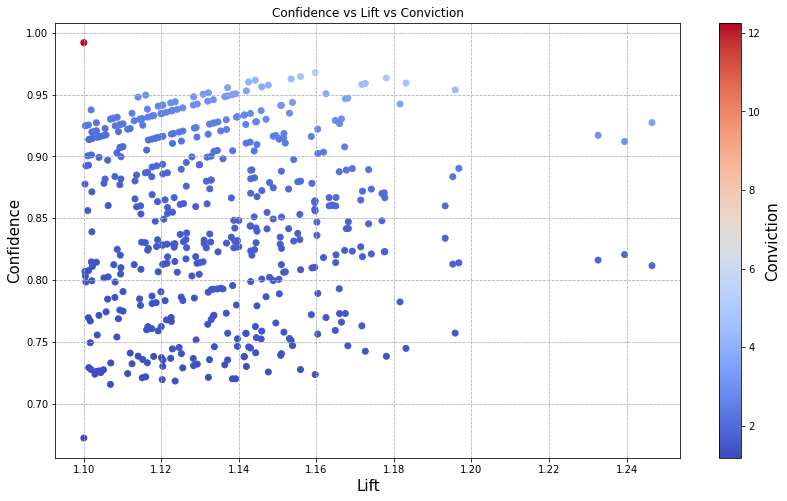

In [184]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (14,8))

color = final_basket.conviction.tolist()

plt.scatter(final_basket.lift, 
            final_basket.confidence,
            marker = "o", 
            linewidth = 1.0, 
            #alpha = 0.7, 
            c = color, 
            cmap = "coolwarm")

plt.grid(ls='dashed')

cbar = plt.colorbar()
cbar.set_label("Conviction", size = 15)

plt.xlabel("Lift", size = 15)
plt.ylabel("Confidence", size = 15)

plt.title("Confidence vs Lift vs Conviction")

plt.show()

We can see that it is those with itemsets having "COLAS REGULAR INDIVIDUAL NO RETORNABLE" as consequents. It seems that if we group the datasets by same consequent items, we are able to see a positive liner relationship. Next step is to conduct a facetgrid plot to confirm our prediction.

Filter itemsets with confidence greater than 0.9 and lift greater than 1.12

In [186]:
basket_filter = final_basket.loc[((final_basket.confidence > 0.90) & (final_basket.lift > 1.12))].sort_values("conviction", ascending = False)
basket_filter

,antecedents,consequents,support,confidence,lift,conviction
429,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COL...",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.603757,0.967767,1.159698,5.134499
428,"(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS R...",(SABORES REGULAR INDIVIDUAL NO RETORNABLE),0.603757,0.963414,1.178060,4.980103
393,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, SAB...",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.607088,0.964600,1.155903,4.675121
433,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, SAB...","(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS R...",0.603757,0.959306,1.183113,4.648579
392,"(COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES...",(SABORES REGULAR INDIVIDUAL NO RETORNABLE),0.607088,0.958972,1.172629,4.440980
...,...,...,...,...,...,...
217,(NARANJADAS),"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGU...",0.632051,0.904558,1.138408,2.152289
214,(NARANJADAS),"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABOR...",0.632217,0.904796,1.134466,2.126462
18,"(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES ...","(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS R...",0.693102,0.910475,1.122890,2.113020
293,"(COLAS REGULAR INDIVIDUAL RETORNABLE, JUGOS Y ...","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABOR...",0.615303,0.904093,1.133585,2.110883


### Further Analysing the Data
####We need to convert frozen set into lists, add the coverted lists as columns to the end of the dataframe

In [187]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

final_basket.loc[:,"antecedent_list"] = [list(item) for item in final_basket["antecedents"]].copy()
final_basket.loc[:,"antecedent_list_1"] = [", ".join(item) for item in final_basket["antecedents"]].copy()

final_basket.loc[:,"consequent_list"] = [list(item) for item in final_basket["consequents"]].copy()
final_basket.loc[:,"consequent_list_1"] = [", ".join(item) for item in final_basket["consequent_list"]].copy()

final_basket.sort_values("conviction", ascending = False, inplace = True)
pd.options.display.max_colwidth = 1000
final_basket.head()

,antecedents,consequents,support,confidence,lift,conviction,antecedent_list,antecedent_list_1,consequent_list,consequent_list_1
399,"(SABORES REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL RETORNABLE),0.606078,0.991981,1.100031,12.249621,"[SABORES REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE]","SABORES REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE",[COLAS REGULAR INDIVIDUAL RETORNABLE],COLAS REGULAR INDIVIDUAL RETORNABLE
429,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.603757,0.967767,1.159698,5.134499,"[SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE]","SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE",[COLAS REGULAR FAMILIAR NO RETORNABLE],COLAS REGULAR FAMILIAR NO RETORNABLE
428,"(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)",(SABORES REGULAR INDIVIDUAL NO RETORNABLE),0.603757,0.963414,1.178060,4.980103,"[COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE]","COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE",[SABORES REGULAR INDIVIDUAL NO RETORNABLE],SABORES REGULAR INDIVIDUAL NO RETORNABLE
393,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.607088,0.964600,1.155903,4.675121,"[SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE]","SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE",[COLAS REGULAR FAMILIAR NO RETORNABLE],COLAS REGULAR FAMILIAR NO RETORNABLE
433,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.603757,0.959306,1.183113,4.648579,"[SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE]","SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE","[COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE]","COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE"


Our hypothesis is true: data grouped by consequent items has a positive linear relationship between confidence, lift and conviction. However, we can see that consequent items COLAS dominates the data set. If we were to take items with only high conviction, the results will only be limited to itemsets with COLAS.

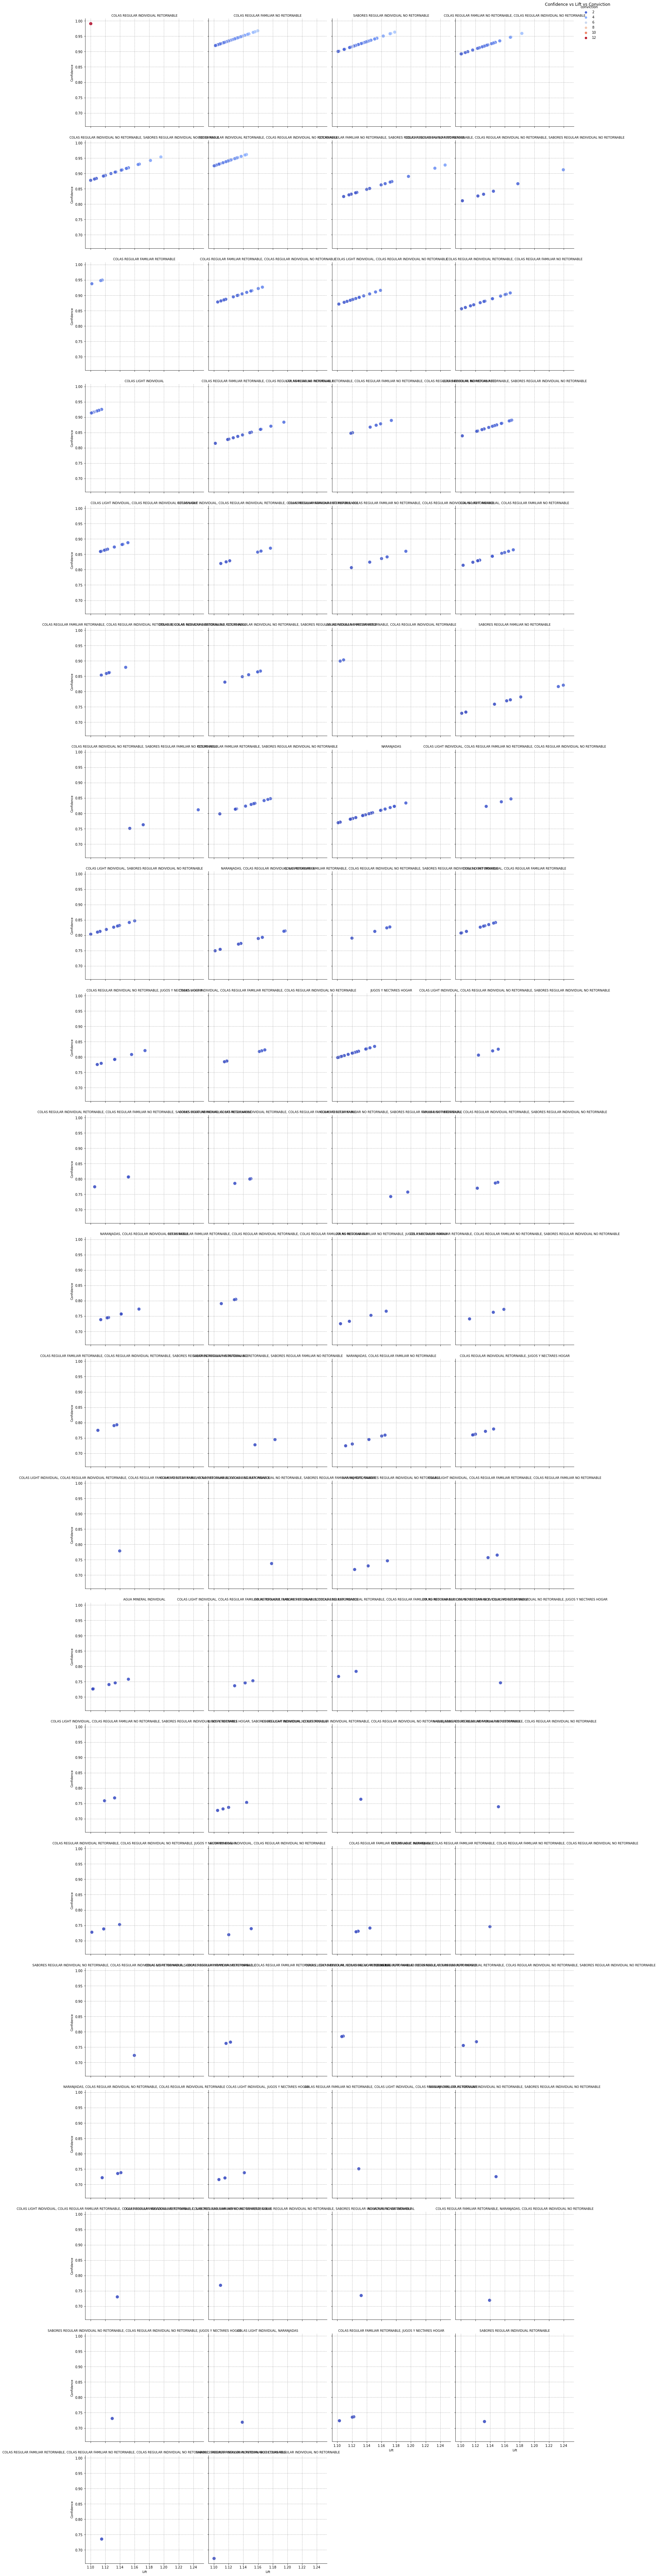

In [188]:
g = sns.relplot(data = final_basket, 
           x = "lift", y = "confidence", 
           col = "consequent_list_1", 
           col_wrap = 4, 
           hue = "conviction", 
           s = 100, 
           alpha = 0.9,
           palette = "coolwarm"
           )

axes = g.axes.flatten()

g.set_xlabels("Lift", size = 9)
g.set_ylabels("Confidence", size = 9)

title = final_basket["consequent_list_1"].unique().tolist()

#set grid style for all axes 
for i in range(len(title)):
    axes[i].grid(ls='dashed')
    axes[i].set_title(title[i], size = 9)

g.fig.suptitle('Confidence vs Lift vs Conviction', y = 1, x = 1)

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
# ajustar el espacio vertical en la parte superior de las gráficas


plt.tight_layout()
plt.show()

Putting it All Together
For our results be less skewed, we can take the following:

top 2 items of each consequent item category ordered by conviction, with conviction higher than 1.8
top 1 items of each consequent item category ordered by conviction, with conviction lower than 1.8
Pick items with high conviction, as they will also have both high confidence and lift values

In [195]:
df_conviction = final_basket[final_basket.conviction >= 1.8]
df_conviction = df_conviction.groupby("consequent_list_1").head(2)
df_conviction.reset_index(inplace = True, drop = True)
df_conviction = df_conviction[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']]
df_conviction.sort_values("conviction", ascending = False)

,antecedents,consequents,support,confidence,lift,conviction
0,"(SABORES REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS REGULAR INDIVIDUAL RETORNABLE),0.606078,0.991981,1.100031,12.249621
1,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.603757,0.967767,1.159698,5.134499
2,"(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)",(SABORES REGULAR INDIVIDUAL NO RETORNABLE),0.603757,0.963414,1.178060,4.980103
3,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.607088,0.964600,1.155903,4.675121
4,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.603757,0.959306,1.183113,4.648579
5,"(COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)",(SABORES REGULAR INDIVIDUAL NO RETORNABLE),0.607088,0.958972,1.172629,4.440980
6,"(COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.603757,0.953710,1.195797,4.373461
7,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.640628,0.961624,1.144275,4.159394
8,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.626745,0.960164,1.142538,4.006927
9,"(NARANJADAS, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.605460,0.947154,1.168125,3.579581


There are 48 items after getting top 1 item grouped by consequents and ordered by conviction. To make results more readable we can group by antecedents.

Pick 1st antecedent - consequent pair, order by conviction descending

In [193]:
#order by consequents
df_first_item = final_basket.sort_values(["consequent_list_1", "conviction"], ascending = [True, False])
df_first_item = df_first_item.groupby("consequent_list_1").head(1)

df_first_item[["antecedents", "consequents", "support","confidence", "lift", "conviction"]].head(10)

,antecedents,consequents,support,confidence,lift,conviction
419,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(AGUA MINERAL INDIVIDUAL),0.604359,0.757768,1.151634,1.411896
421,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),"(AGUA MINERAL INDIVIDUAL, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.604359,0.739009,1.150808,1.371061
465,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),(AGUA PURIFICADA INDIVIDUAL),0.601510,0.735526,1.132437,1.325243
352,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",(COLAS LIGHT INDIVIDUAL),0.610284,0.925202,1.115219,2.277943
362,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.610284,0.864658,1.171442,1.934990
372,"(COLAS REGULAR FAMILIAR RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.610284,0.847108,1.168256,1.797974
371,"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.610284,0.768056,1.132880,1.388407
233,"(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR RETORNABLE)",0.626745,0.841333,1.147269,1.680657
370,"(COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE)",0.610284,0.765196,1.149544,1.423948
375,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.610284,0.746254,1.139643,1.360361


In [194]:
#order by antecedent 
df_first_item = df_first_item.sort_values(["antecedent_list_1", "conviction"], ascending = [True, False])
df_first_item[["antecedents", "consequents", "support","confidence", "lift", "conviction"]]

,antecedents,consequents,support,confidence,lift,conviction
179,(COLAS LIGHT INDIVIDUAL),"(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.637659,0.768620,1.108957,1.326381
373,(COLAS LIGHT INDIVIDUAL),"(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.610284,0.735623,1.115219,1.287471
363,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.610284,0.826815,1.171442,1.698706
231,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.626745,0.890109,1.169269,2.172584
171,"(COLAS LIGHT INDIVIDUAL, COLAS REGULAR INDIVIDUAL NO RETORNABLE)","(COLAS REGULAR INDIVIDUAL RETORNABLE, COLAS REGULAR FAMILIAR NO RETORNABLE, SABORES REGULAR INDIVIDUAL NO RETORNABLE)",0.637659,0.806548,1.152002,1.550114
...,...,...,...,...,...,...
317,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),"(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS LIGHT INDIVIDUAL, COLAS REGULAR FAMILIAR RETORNABLE)",0.614580,0.751507,1.128979,1.345503
465,(SABORES REGULAR INDIVIDUAL NO RETORNABLE),(AGUA PURIFICADA INDIVIDUAL),0.601510,0.735526,1.132437,1.325243
429,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)",(COLAS REGULAR FAMILIAR NO RETORNABLE),0.603757,0.967767,1.159698,5.134499
433,"(SABORES REGULAR INDIVIDUAL NO RETORNABLE, SABORES REGULAR FAMILIAR NO RETORNABLE)","(COLAS REGULAR FAMILIAR NO RETORNABLE, COLAS REGULAR INDIVIDUAL NO RETORNABLE)",0.603757,0.959306,1.183113,4.648579


#### CONCLUSION
1. Colas domains the data, so as they are the products which commonly is bought after buying any other product, so it is very important to have a freezer dedicated to these products in middle of all other products, the posibility to buy them after the purchase of any other product is very high.

So at the end it is very hard to identify exactly which product has to be after other, because there are several combinations, and what we are very sure is that all "COLAS" presentations and "SABORES", must be all togheter because many transactions mention that they are commonly bought togheter. It may sound obvious, and Coca Cola Company knows it, but all colas & Sabores shouldn´t be separated.
